# Sample Usage of Spotify Playlist Scraper

This notebook demonstrates several ways in which the Spotify Playlist Scraper can be used to analyze data from Spotify playlists.

## Loading Data

First, we load the data from the selected playlist using `Playlist(url)`.

In [1]:
from SpotifyPlaylistScraper import *
inputs = [(['3', ''],), '1', '1', '1', '1', '1', '1', ('3', '1', 'Mixed Emotions'), (['2', 'ZHU'],), '1', '1', (['3', ''],), '1', '1', '1', '1', '1', '1', ('1', ['3', ''], 'Gouryella'), '1', '1']
inputs = [list(i) for i in inputs]
p = Playlist('https://open.spotify.com/playlist/2X38qrMnKVxbZMSrE72Ovh', fixing_inputs=inputs, verbose=False)
print(p)

Playlist name: The Magical 500
Playlist author: Tomorrowland
Number of likes: 3833
Number of songs: 491
Total duration: 104589 seconds


Upon loading the playlist, songs which might require fixing of details are automatically marked. Note that the inputs to fix these songs were previously recorded and are passed into the `fixing_inputs` argument in the appropriate format. These inputs are used to fix the songs automatically while loading the playlist. However, normally, the `fixing_inputs` parameters are not used. Instead, one should normally call the playlist's `.fix()` method to correct any songs with incorrect information.

## Accessing Songs

The `Playlist` stores information on the songs it contains in a list. This list can be accessed using the `songs` attribute, and contains songs as `Song` objects. Here, we print the first 10 songs in the playlist.

In [2]:
p.songs[:10]

[Head & Heart (feat. MNEK) by Joel Corry, MNEK,
 Roses - Imanbek Remix by SAINt JHN, Imanbek,
 In Your Eyes (feat. Alida) by Robin Schulz, Alida,
 Secrets by Regard, RAYE,
 Lose Control by MEDUZA, Becky Hill, Goodboys,
 Turn Me On (feat. Vula) by Riton, Oliver Heldens, Vula,
 On My Mind by Diplo, SIDEPIECE,
 Breaking Me by Topic, A7S,
 The Business by Tiësto,
 Love to Go by Lost Frequencies, Zonderling, Kelvin Jones]

Note that it is possible to modify details of a song, including updating a song's list of featured artist using `s.fix_featured_artists()`, correcting a song's remix information using `s.fix_remix()`, or overwriting the song's original name using `.fix_original_name()`.

## Finding the Most Common Artists in the Playlist

We can find out which artists are most represented in the playlist using a `Counter` from the `collections` library.

In [3]:
from collections import Counter
all_artists = [a for a_s in [s.artists for s in p.songs] for a in a_s]
c = Counter(all_artists)
del c[None]
c.most_common(10)

[('Oliver Heldens', 12),
 ('CamelPhat', 11),
 ('Jack Wins', 11),
 ('Nicky Romero', 10),
 ('Tiësto', 9),
 ('Vintage Culture', 9),
 ('Armin van Buuren', 9),
 ('DubVision', 9),
 ('Don Diablo', 8),
 ('David Guetta', 7)]

If we wish to find only primary artists (rather than featured artists or remix artists), we can use the `s.get_primary_artists()` method.

In [4]:
primary_artists = [a for a_s in [s.get_primary_artists() for s in p.songs] for a in a_s]
c_primary = Counter(primary_artists)
c_primary.most_common(10)

[('CamelPhat', 11),
 ('Oliver Heldens', 10),
 ('Armin van Buuren', 9),
 ('Nicky Romero', 9),
 ('Jack Wins', 9),
 ('Tiësto', 8),
 ('Don Diablo', 7),
 ('Becky Hill', 6),
 ('Diplo', 6),
 ('David Guetta', 6)]

## Analyzing the Song Name Lengths

We can plot a historgram of the number words in each song's name by using the `original_name` attribute, which does not include information on featured artists and remix versions in the song name. As we can see, in this playlist the vast majority of songs are 3 words long or shorter.

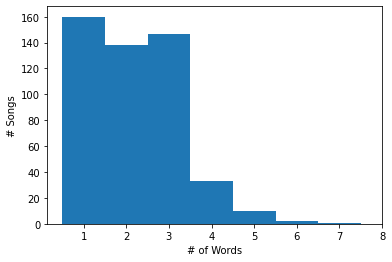

In [5]:
from numpy import arange
import matplotlib.pyplot as plt

song_name_length = [len(s.original_name.split()) for s in p.songs]
bins = arange(1, max(song_name_length) + 1.5) - 0.5

fig, ax = plt.subplots()
plt.hist(song_name_length, bins)
ax.set_xticks(bins + 0.5)

plt.xlabel("# of Words")
plt.ylabel("# Songs")
plt.show()

## Analyzing the Number of Artists per Song

Similarly, we can analyze the number of artists per song. In this playlist, most songs have 1 or 2 artists, but some have 3 or even 4.

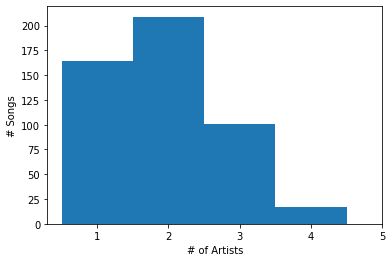

In [6]:
from numpy import arange
import matplotlib.pyplot as plt

num_artists = [len(s.artists) for s in p.songs]
bins = arange(1, max(num_artists) + 1.5) - 0.5

fig, ax = plt.subplots()
plt.hist(num_artists, bins)
ax.set_xticks(bins + 0.5)

plt.xlabel("# of Artists")
plt.ylabel("# Songs")
plt.show()

## Finding Similar Artists

We can use the `fuzzywuzzy` library to compare artists names and find similar artist names. This can help identify artists that also appear in collaborations, such as `Dimitri Vegas & Like Mike` in this example.

In [7]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
threshold = 90
l = list(c.keys())
for a in l:
    match, ratio = process.extract(a, l, limit=2)[1]
    if ratio >= threshold:
        l.remove(match)
        print(a, '-', match, ratio)

Wes - VER:WEST 90
Dimitri Vegas & Like Mike - Dimitri Vegas 90
Mylo - Justin Mylo 90
Sia - Technasia 90
ARTY - Party Pupils 90
MAX - Kareen Lomax 90
Solardo - Ola 90
Felix Jaehn - Felix 90
Cid - CID 100
Wankelmut - NK 90
Ava Max - MAX 90
LOWES - Wes 90
MKLA - MK 90
Guz - Guz Zanotto 90
Like Mike - Dimitri Vegas & Like Mike 90
